In [1]:
library(dplyr)
library(RMThreshold)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'RMThreshold' was built under R version 3.6.3"

In [2]:
t <- seq(-3,3,0.01)

In [3]:
# Define a function to show face images ####
showImage <- function(x, m, n) {
  x %>%
  as.numeric() %>%
  matrix(nrow = m, ncol=n) %>%
  apply(2, rev) %>% #Rotate matrix by 90 degrees, step one : reverse columns 
  t %>% # Rotate matrix by 90 degrees, step two: transpose matrix
  image(col=grey(seq(0, 1, length=256)), xaxt="n", yaxt="n") # 256 diffrent intensities between 0 and 1 defined
}

In [4]:
# Define a function to show face images ####
showImage <- function(x) {
  x %>%
  apply(2, rev) %>% #Rotate matrix by 90 degrees, step one : reverse columns 
  t %>% # Rotate matrix by 90 degrees, step two: transpose matrix
  image(col=grey(seq(0, 1, length=256)), xaxt="n", yaxt="n") # 256 diffrent intensities between 0 and 1 defined
}

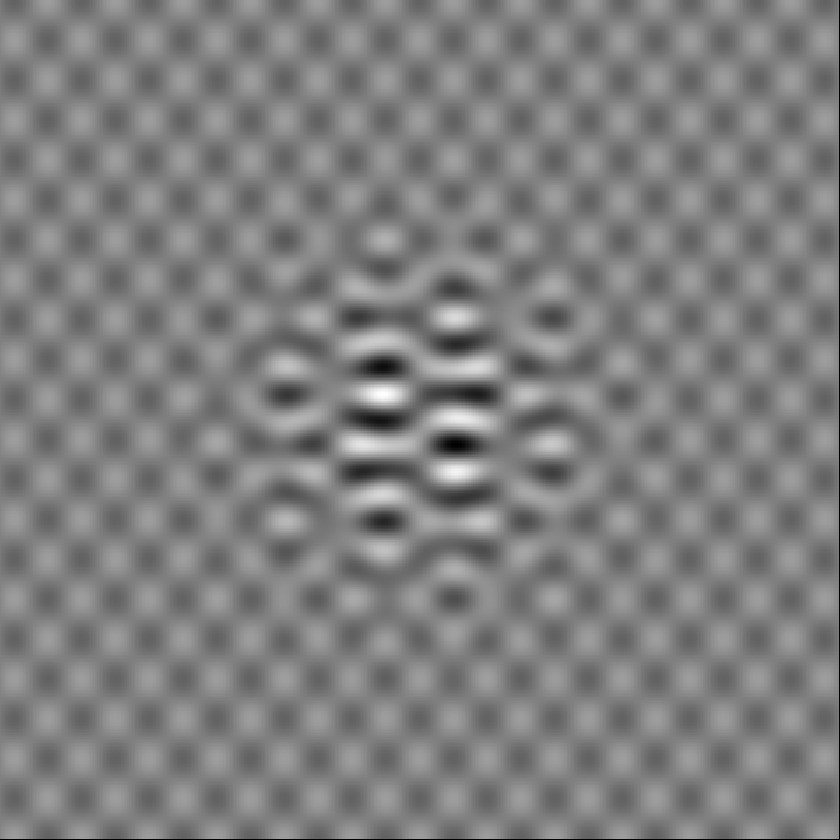

In [5]:
Utrue <- matrix(cos(17*t) * exp(-t**2), ncol=1)
Utrue <- cbind(Utrue, sin(11*t))

Strue <- matrix(c(2, 0, 0, 0.5), nrow=2, ncol=2)

Vtrue <- matrix(sin(5*t) * exp(-t**2), ncol=1)
Vtrue <- cbind(Vtrue, cos(13*t))

X = Utrue %*% Strue %*% t(Vtrue)

par(mfrow=c(1, 1), mar=c(0, 0, 0, 0))
showImage(X)


  601 x 601 matrix read.
  This matrix contains 361200 non-zero cells.

  Gaussian noise with mean 0 and standard deviation 1 added.
  The noise ranges from -4.514 to 4.593 



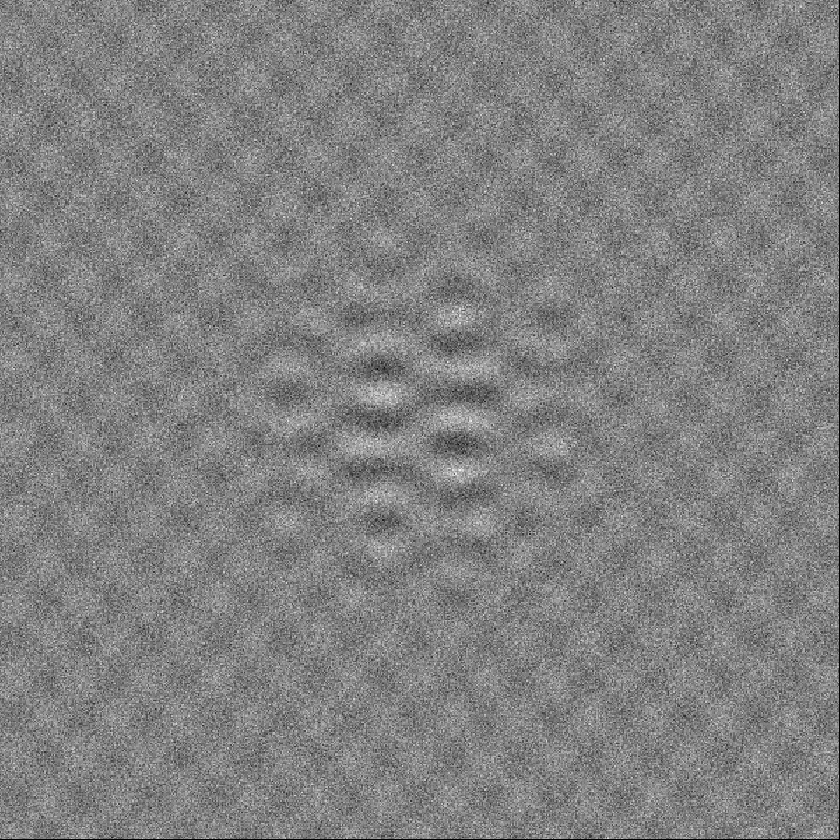

In [6]:
#Add some noise and plot noisy image

sigma <- 1
Xnoisy <- add.Gaussian.noise(X, mean = 0, stddev = sigma, symm = FALSE)
par(mfrow=c(1, 1), mar=c(0, 0, 0, 0))
showImage(Xnoisy)

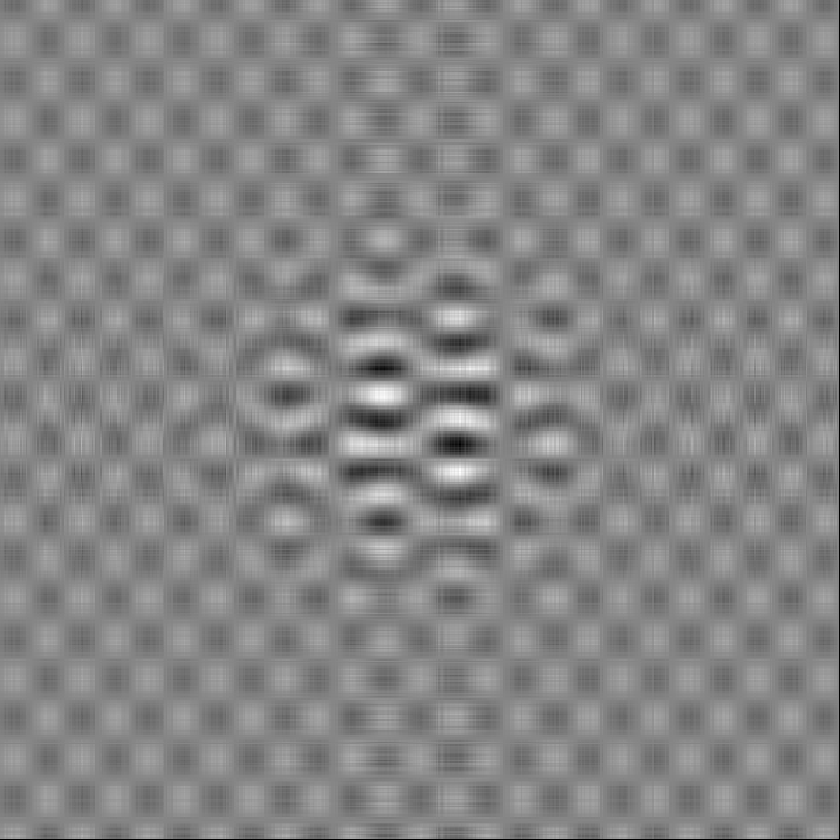

In [7]:
res <- svd(Xnoisy)
S <- res$d
U <- res$u
VT <- t(res$v)

N <- dim(Xnoisy)[1]

#we have square matrix and noise magnitude is known, so we can use formula 1.31 on the page 31 (First Edition)
cutoff = (4/sqrt(3)) * sqrt(N) * sigma # Hard threshold
r <- max(which(S > cutoff)) # Keep modes w/ sig > cutoff 

Xclean = U[,1:r] %*% diag(S[1:r]) %*% VT[1:r,]

par(mfrow=c(1, 1), mar=c(0, 0, 0, 0))
showImage(Xclean)

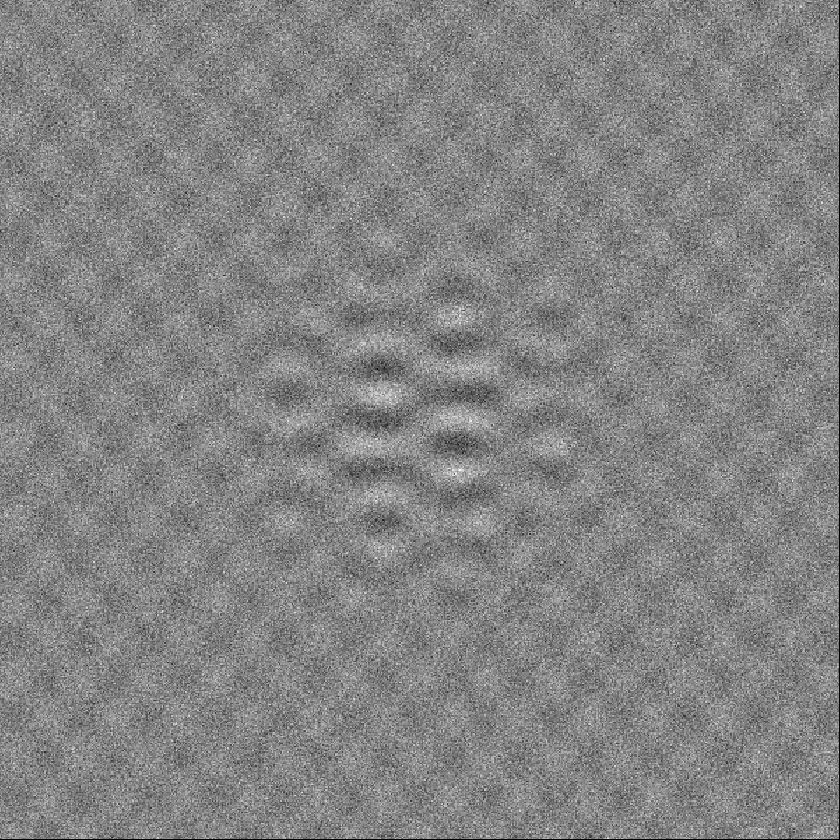

In [8]:
cdS <- cumsum(S) / sum(S) # Cumulative energy
r90 = min(which(cdS > 0.90)) # Find r to capture 90% energy

X90 = U[,1:r90] %*% diag(S[1:r90]) %*% VT[1:r90,]
par(mfrow=c(1, 1), mar=c(0, 0, 0, 0))
showImage(X90)

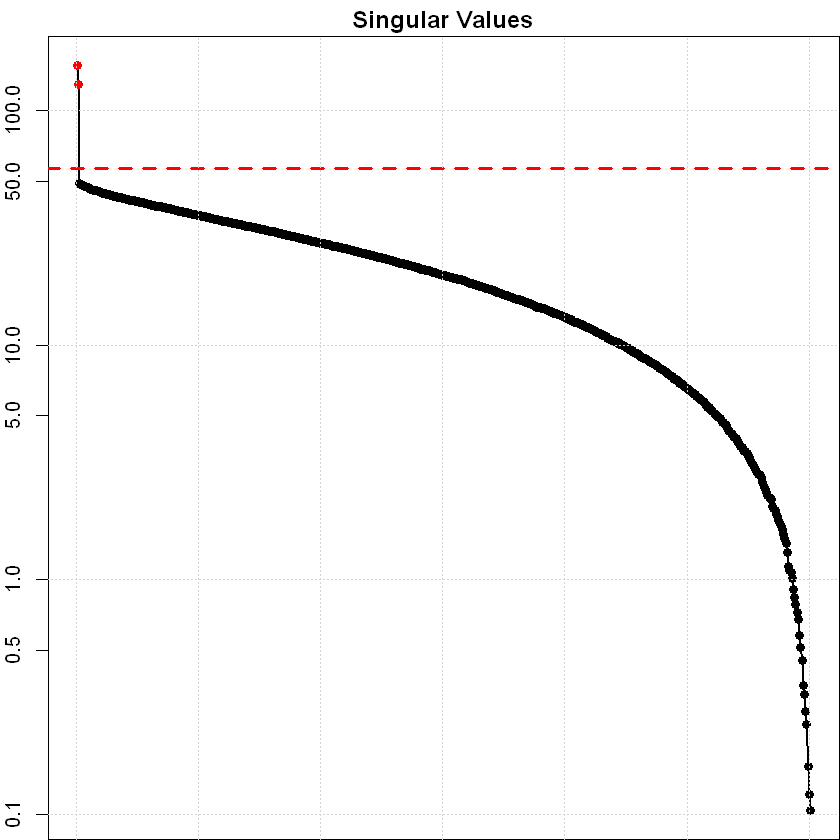

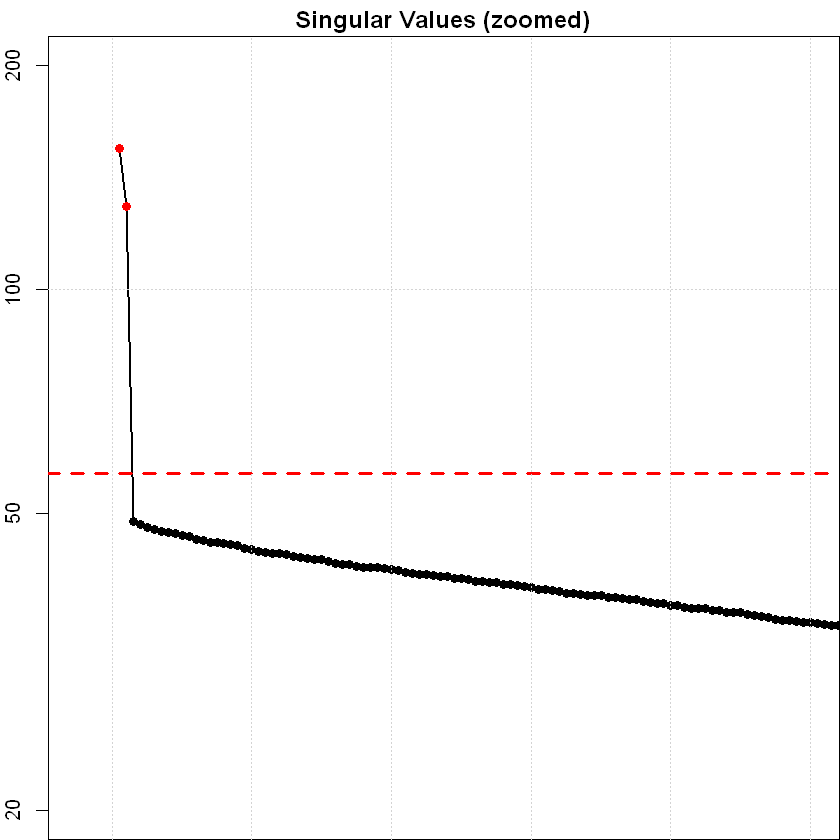

In [9]:
# Plot Singual Values

par(mfrow = c(1, 1), mar=c(0, 2, 1.5, 0))

# on first two plots it's shown a optimal hard threshold as red dashed line
plot(1:length(S), S, main="Singular Values", xlab="", ylab="Singular Value", log="y", type="l", lwd="2")
points(1:length(S[1:r]), S[1:r], pch=16, col="red")
points((r+1):length(S), S[(r+1):length(S)], pch=16, col="black")
abline(h=cutoff, lty=2, lwd=3, col="red") # display cutoff line
grid()

plot(1:length(S), S, main="Singular Values (zoomed)", xlab="", ylab="Singular Value", log="y", type="l", lwd="2", xlim=c(-5,100), ylim=c(20,200))
points(1:length(S[1:r]), S[1:r], pch=16, col="red")
points((r+1):length(S), S[(r+1):length(S)], pch=16, col="black")
abline(h=cutoff, lty=2, lwd=3, col="red") # display cutoff line
grid()

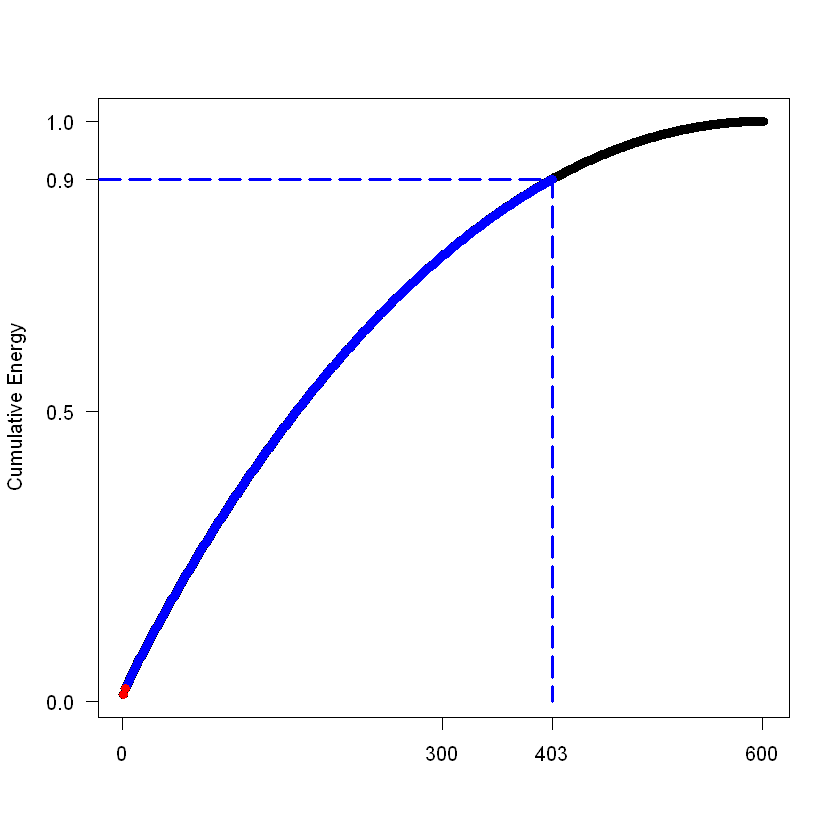

In [15]:
#on this plot we see a cumulative energy and 90% of energy displayed as blue dashed line
#2 red points at the beginning is our hard threshold

plot(1:length(cdS), cdS, main="", xlab="", ylab="Cumulative Energy", type="b", lwd="2", xaxt="n", yaxt="n")
axis(1, at=c(0, 300, r90, 600), las=1)
axis(2, at=c(0.0, 0.5, 0.9, 1.0), las=1) 
points(1:r90, cdS[1:r90], pch=16, col="blue")
points(1:r, cdS[1:r], pch=16, col="red")
lines(x=c(-50, r90, r90), y=c(0.9,0.9, 0), lwd=3, lty=5, col="blue")